<a href="https://colab.research.google.com/github/richardp123456/PersonalProjects/blob/main/Pilz_Richard_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Problem Introduction & Motivation**

For this project, my objective is to predict if an individual has heart condition based on various indicators, including demographics, medical, and symptomatic variables. This problem is critical because accurate predictions could help in early diagnosis and treatment of heart conditions, potentially improving patients health outcomes and thereby proactively reducing healthcare costs.

This dataset contains a target binary variable "heart_disease", where 1 indicates the presence of heart disease, and 0 indicates the absence of heart disease.

##The predictor variables are:

**age**: Age of the individual.

**sex**: Gender of the individual.

**max_heart_rate**: The maximum recorded heart rate.

**angina_level**: Severity of angina, with categories such as "No" and "Mild."

**non_anginal_pain**: A binary feature indicating whether the individual has experienced non-anginal pain.


#**2. Exploratory Data Analysis (EDA)**


**Loading the Data**

In [1]:
import pandas as pd
# I will load the data set into Google Colab
df = pd.read_csv('/content/heart_disease.csv')
# Display the first few rows of the dataset without skipping any rows as they include the variables
df.head()

,heart_disease,age,sex,max_heart_rate,angina_level,non_anginal_pain
0,0,69.0,male,131,No,0
1,0,69.0,female,151,No,0
2,0,NaN,female,114,No,0
3,1,65.0,male,174,No,0
4,0,64.0,male,144,Mild,0


**Checking for Missing Values**

In [2]:
# Checking for missing values
df.isnull().sum()

# Handling for missing values (mean imputation for age)
df['age'].fillna(df['age'].mean(), inplace=True)

# Converting 'sex' and 'angina_level' to numerical values
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['angina_level'] = df['angina_level'].map({'No': 0, 'Mild': 1})

# Display the rows with negative heart rates (for verification)
negative_heart_rate_rows = df[df['max_heart_rate'] < 0]
print(f"Rows with negative heart rates:\n{negative_heart_rate_rows}")

# Remove rows where the 'max_heart_rate' is negative because these outliers will be disregarded
df = df[df['max_heart_rate'] >= 0]

# Verifying if negative heart rates have been removed
print(f"Remaining rows after removing negative heart rates: {df.shape[0]}")


Rows with negative heart rates:
     heart_disease   age  sex  max_heart_rate  angina_level  non_anginal_pain
7                1  61.0    1            -145           0.0                 0
39               0  56.0    1            -163           0.0                 0
110              0  54.0    0            -170           0.0                 1
Remaining rows after removing negative heart rates: 294


<ipython-input-2-145ac102149a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


**Handling missing values (mean imputation for age) & dropping negative heart rate**

In [3]:
# Display the number of rows before dropping missing values
print(f"Number of rows before dropping missing values: {df.shape[0]}")

# Drop rows with any missing values
df.dropna(inplace=True)

# Display the number of rows after dropping missing values
print(f"Number of rows after dropping missing values: {df.shape[0]}")


Number of rows before dropping missing values: 294
Number of rows after dropping missing values: 258


**Transforming & Visualizing**

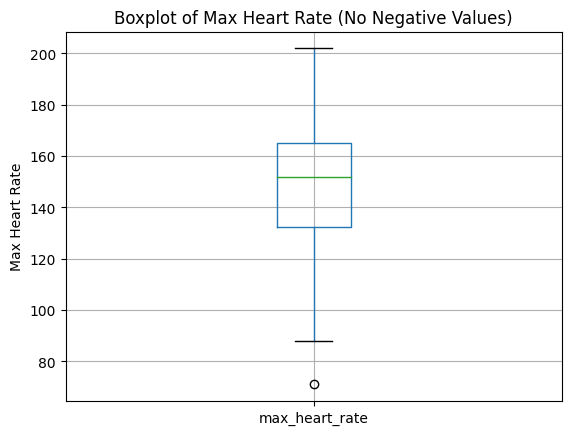

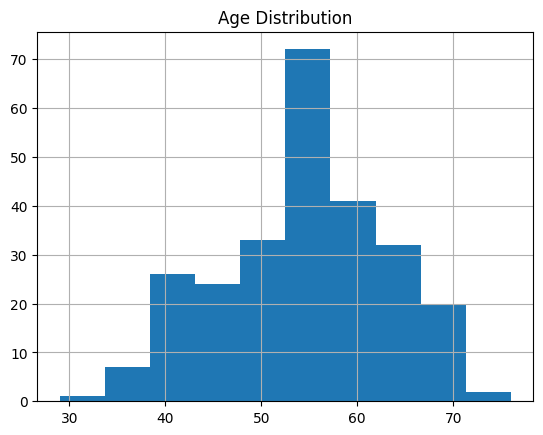

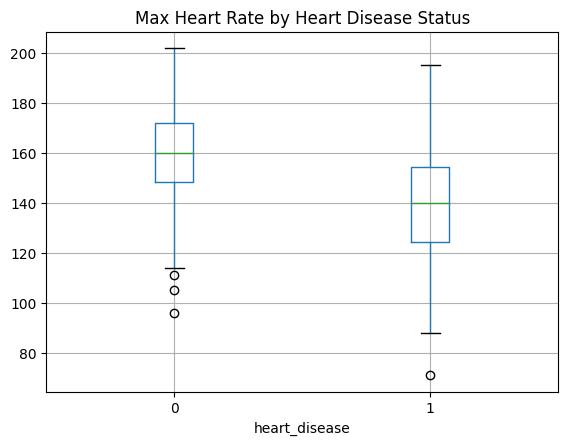

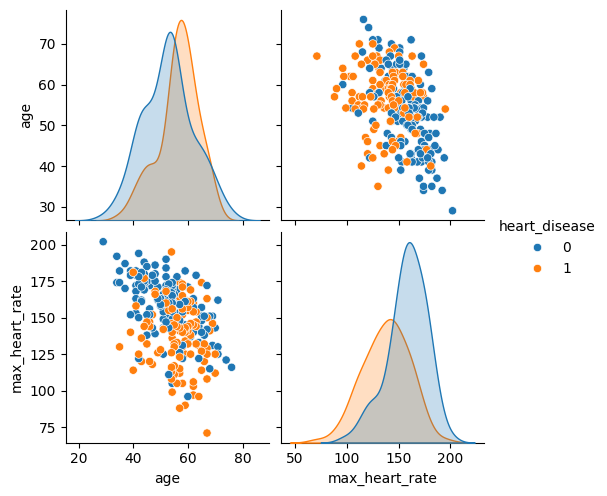

In [5]:
#Converting 'sex' and 'angina_level' to numerical values
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['angina_level'] = df['angina_level'].map({'No': 0, 'Mild': 1, 'Severe': 2})

import matplotlib.pyplot as plt
import seaborn as sns

# Filter out negative values for max_heart_rate
df[df['max_heart_rate'] >= 0].boxplot(column='max_heart_rate')
plt.title('Boxplot of Max Heart Rate (No Negative Values)')
plt.ylabel('Max Heart Rate')
plt.show()

# Plotting histograms for numerical variables for Age
df['age'].hist()
plt.title('Age Distribution')
plt.show()

df.boxplot(column='max_heart_rate', by='heart_disease')
plt.title('Max Heart Rate by Heart Disease Status')
plt.suptitle('')
plt.show()

#seaborn Blot to show the relationship between the numerical values
sns.pairplot(df[['age', 'max_heart_rate', 'heart_disease']], hue='heart_disease')
plt.show()



#**3. Model Selection**

**Logistic regression**
The main objective of this data analysis is to classify whether an individual has heart disease based on existing variables. Since this is a binary classification problem, a **logistic regression** machine learning model is the optimal choice for predicting the binary outcome. It is straightforward, easy to interpret, and provides a clear prediction (0 or 1) for the target variable. It also works effectively with the imputation and transformation methods applied earlier and does not take very long to process.

#**4. Model Evaluation**

I think this is the best method as it is easily interpretable and works well with both smaller and large datasets. To assess the performance of my model for classifying heart disease, a combination of accuracy, precision, F1 score and recall can be applied. It is important to have a balanced evaluation, as the model's predictions directly impact patient health outcomes. Therefore, a model is needed that is not only accurate but also precise to reduce the number of false positives. The F1 scores can minimize the false negatives, which is vital as it allows healthcare providers a more reliable resource of diagnoses.